In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import norm as norm


**Read the data**

In [2]:
cancer_df = pd.read_csv('dataset.csv')

cancer_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


**Data preprocess**

In [3]:
df = cancer_df.copy()

# Setting Malignant as the positive class and Benign as the negative class
df['diagnosis'] = df['diagnosis'].replace('B', 0)
df['diagnosis'] = df['diagnosis'].replace('M', 1)

df.dropna(axis = 0, inplace=True)
# df.fillna(df.mean(), inplace=True)

# standard normalization
normalize = False
if normalize:
    df_input = df.iloc[:, 2:]
    df_response = df.iloc[:, :2]
    df_input = (df_input - df_input.mean()) / df_input.std()
    df = pd.concat([df_response, df_input], axis = 1)

df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Part B - Fisher’s Linear Discriminant Analysis

In [4]:
class Fisher:
    def __init__(self, normalizeStatus = False):
        self.W = None
        self.thresh0 = None
        self.thresh1 = None
        self.normalizeStatus = normalizeStatus

    def find_w(self, X, y):
        mean_0 = X[y == 0].mean() # data which are benign
        mean_1 = X[y == 1].mean() # data which are malignant
        mean_diff = mean_1 - mean_0
        
        cov_0 = np.cov(X[y == 0].T) # covariance matrix of benign data
        cov_1 = np.cov(X[y == 1].T) # covariance matrix of malignant data
        cov_inv = np.linalg.inv(cov_0 + cov_1) # (s1^2 + s2^2)^-1

        w = np.dot(cov_inv, mean_diff) # w = (s1^2 + s2^2)^-1 * (mean_1 - mean_0)
        self.W = w
        return w
    
    def plot_pdfs(self, mean0, mean1, std0, std1, threshold):
        # change X limits for pdf plot to -3 to 3 if normalised W is used. Otherwise set it to -30 to 30 
        if self.normalizeStatus == True:
            X_axis = np.linspace(-10.0,15.0,100000)
        else:
            X_axis = np.linspace(-5.0,45.0,100000)
        plt.plot(X_axis, norm.pdf(X_axis, mean0, std0),'-', color='b',label='Class Benign')    
        plt.plot(X_axis, norm.pdf(X_axis, mean1, std1),'-', color='r',label='Class Malignant')
        plt.plot([threshold], norm.pdf([threshold], mean0, std0), '.', color='g',label='Threshold')
        plt.legend(loc = 'upper right')
        plt.title('Normal Distributions. Threshold = '+ str(threshold))
        plt.show()

    def find_thresh(self, X, y):
        # projection 
        proj_0 = np.dot(X[y==0], self.W)
        proj_1 = np.dot(X[y==1], self.W)

        # mean of the projection
        mean_0 = proj_0.mean()
        mean_1 = proj_1.mean()

        # standard deviation of the projection
        std_0 = proj_0.std()
        std_1 = proj_1.std()

        # solve for the threshold
        coeff1 = 1/(2*std_0**2) - 1/(2*std_1**2) # 1/(2s1^2) - 1/(2s2^2)
        coeff2 = mean_1/(std_1**2) - mean_0/(std_0**2) # mean_1/(s2^2) - mean_0/(s1^2)
        coeff3 = mean_0**2 /(2*std_0**2) - mean_1**2 / (2*std_1**2) - np.log(std_1/std_0) # mean_0^2/(2s1^2) - mean_1^2/(2s2^2) - ln(s2/s1)

        coeffs = [coeff1, coeff2, coeff3]

        roots_of_eq = np.roots(coeffs)
        threshold = roots_of_eq[0]
        if self.normalizeStatus == True:
            threshold = roots_of_eq[1]
        self.thresh0 = roots_of_eq[0]
        self.thresh1 = roots_of_eq[1] 

        # plot the pdfs
        self.plot_pdfs(mean_0, mean_1, std_0, std_1, threshold)

        return threshold
    
    def plot_hist(self, X, y):
        threshold = self.thresh0
        if self.normalizeStatus == True:
            threshold = self.thresh1
        # projection 
        proj_0 = np.dot(X[y==0], self.W)
        proj_1 = np.dot(X[y==1], self.W)

        plt.hist(proj_0, bins=50, alpha=0.5, label='Class Benign', color='b')
        plt.hist(proj_1, bins=50, alpha=0.5, label='Class Malignant', color='r')
        plt.axvline(threshold, color='g', label='Threshold')
        plt.legend(loc = 'upper right')
        plt.title('Histograms of the projections. Threshold = '+ str(threshold))
        plt.show()

    def accuracy(self, X_test, y_test):
        proj = np.dot(X_test, self.W)
        y_pred = proj > self.thresh0
        if self.normalizeStatus == True:
            y_pred = proj > self.thresh1
        return np.mean(y_test == y_pred)

## FLDM1

In [5]:
df_shuffle = df.sample(frac=1, axis=0)

split = int(df.shape[0]*0.67)

X_train = df_shuffle.iloc[:split, 2:].copy()
y_train = df_shuffle.iloc[:split, 1].copy()
X_test = df_shuffle.iloc[split:, 2:].copy()
y_test = df_shuffle.iloc[split:, 1].copy()

df_shuffle

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
490,91376701,0,12.250,22.44,78.18,466.5,0.08192,0.05200,0.017140,0.012610,...,14.17,31.99,92.74,622.9,0.1256,0.18040,0.12300,0.06335,0.3100,0.08203
515,916221,0,11.340,18.61,72.76,391.2,0.10490,0.08499,0.043020,0.025940,...,12.47,23.03,79.15,478.6,0.1483,0.15740,0.16240,0.08542,0.3060,0.06783
297,892189,1,11.760,18.14,75.00,431.1,0.09968,0.05914,0.026850,0.035150,...,13.36,23.39,85.10,553.6,0.1137,0.07974,0.06120,0.07160,0.1978,0.06915
460,911296201,1,17.080,27.15,111.20,930.9,0.09898,0.11100,0.100700,0.064310,...,22.96,34.49,152.10,1648.0,0.1600,0.24440,0.26390,0.15550,0.3010,0.09060
171,87163,1,13.430,19.63,85.84,565.4,0.09048,0.06288,0.058580,0.034380,...,17.98,29.87,116.60,993.6,0.1401,0.15460,0.26440,0.11600,0.2884,0.07371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,8510824,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.029560,0.020760,...,10.23,15.66,65.13,314.9,0.1324,0.11480,0.08867,0.06227,0.2450,0.07773
517,916838,1,19.890,20.26,130.50,1214.0,0.10370,0.13100,0.141100,0.094310,...,23.73,25.23,160.50,1646.0,0.1417,0.33090,0.41850,0.16130,0.2549,0.09136
265,88995002,1,20.730,31.12,135.70,1419.0,0.09469,0.11430,0.136700,0.086460,...,32.49,47.16,214.00,3432.0,0.1401,0.26440,0.34420,0.16590,0.2868,0.08218
2,84300903,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,23.57,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758


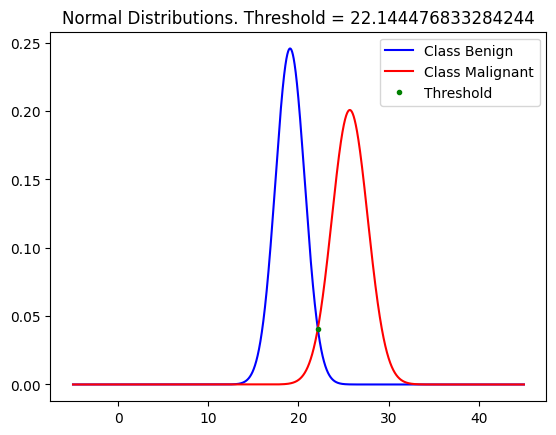

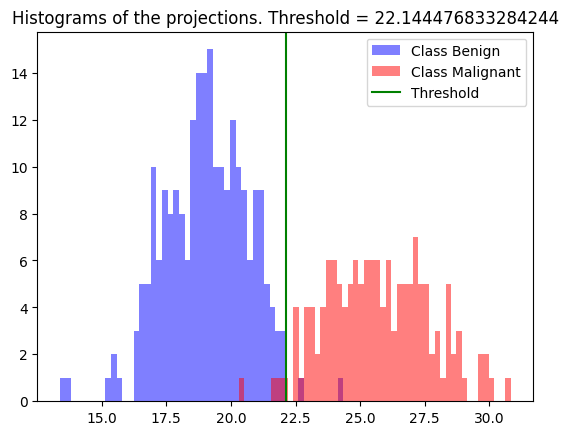

Accuracy on Training Data: 0.9840848806366048
Accuracy on Testing Data: 0.967741935483871


In [6]:
FLDM1 = Fisher(normalize)
fldm1_weight = FLDM1.find_w(X_train, y_train)
fldm1_thresh = FLDM1.find_thresh(X_train, y_train)
FLDM1.plot_hist(X_train, y_train)

print("Accuracy on Training Data:", FLDM1.accuracy(X_train, y_train))

print("Accuracy on Testing Data:", FLDM1.accuracy(X_test, y_test))

## FLDM2

In [7]:
df_input = df_shuffle.iloc[:, 2:]
df_response = df_shuffle.iloc[:, :2]
df_input = df_input.sample(frac=1, axis=1)
df_feat_shuffle = pd.concat([df_response, df_input], axis=1)

X_train = df_feat_shuffle.iloc[:split, 2:].copy()
y_train = df_feat_shuffle.iloc[:split, 1].copy()
X_test = df_feat_shuffle.iloc[split:, 2:].copy()
y_test = df_feat_shuffle.iloc[split:, 1].copy()

df_feat_shuffle

,id,diagnosis,radius_mean,texture_worst,concavity_worst,symmetry_se,symmetry_mean,compactness_se,fractal_dimension_worst,area_se,...,smoothness_worst,perimeter_mean,compactness_worst,radius_se,concavity_se,smoothness_mean,area_mean,fractal_dimension_mean,symmetry_worst,concave points_worst
490,91376701,0,12.250,31.99,0.12300,0.01608,0.1544,0.012050,0.08203,18.04,...,0.1256,78.18,0.18040,0.2239,0.009410,0.08192,466.5,0.05976,0.3100,0.06335
515,916221,0,11.340,23.03,0.16240,0.02434,0.1927,0.016410,0.06783,18.19,...,0.1483,72.76,0.15740,0.2430,0.020990,0.10490,391.2,0.06211,0.3060,0.08542
297,892189,1,11.760,23.39,0.06120,0.01575,0.1619,0.010050,0.06915,49.11,...,0.1137,75.00,0.07974,0.6450,0.012720,0.09968,431.1,0.06287,0.1978,0.07160
460,911296201,1,17.080,34.49,0.26390,0.02045,0.1793,0.022190,0.09060,115.20,...,0.1600,111.20,0.24440,0.9291,0.027210,0.09898,930.9,0.06281,0.3010,0.15550
171,87163,1,13.430,29.87,0.26440,0.01520,0.1598,0.010630,0.07371,43.40,...,0.1401,85.84,0.15460,0.4697,0.021510,0.09048,565.4,0.05671,0.2884,0.11600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,8510824,0,9.504,15.66,0.08867,0.02027,0.1815,0.014320,0.07773,15.70,...,0.1324,60.34,0.11480,0.2773,0.019850,0.10240,273.9,0.06905,0.2450,0.06227
517,916838,1,19.890,25.23,0.41850,0.01057,0.1802,0.023030,0.09136,59.70,...,0.1417,130.50,0.33090,0.5079,0.030520,0.10370,1214.0,0.06188,0.2549,0.16130
265,88995002,1,20.730,47.16,0.34420,0.01367,0.1769,0.014780,0.08218,199.70,...,0.1401,135.70,0.26440,1.1720,0.021430,0.09469,1419.0,0.05674,0.2868,0.16590
2,84300903,1,19.690,25.53,0.45040,0.02250,0.2069,0.040060,0.08758,94.03,...,0.1444,130.00,0.42450,0.7456,0.038320,0.10960,1203.0,0.05999,0.3613,0.24300


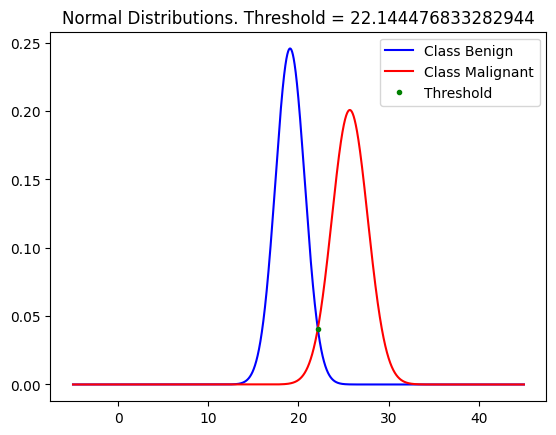

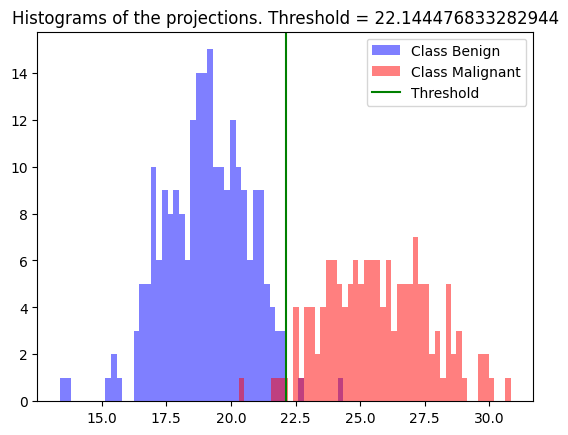

Accuracy on Training Data: 0.9840848806366048
Accuracy on Testing Data: 0.967741935483871


In [8]:
FLDM2 = Fisher(normalize)
fldm1_weight = FLDM2.find_w(X_train, y_train)
fldm1_thresh = FLDM2.find_thresh(X_train, y_train)
FLDM2.plot_hist(X_train, y_train)

print("Accuracy on Training Data:", FLDM2.accuracy(X_train, y_train))

print("Accuracy on Testing Data:", FLDM2.accuracy(X_test, y_test))